# Explore/Prepare Data

In [12]:
!pip install geopandas contextily matplotlib
!pip install --upgrade contextily

In [5]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

In [8]:
# The file ID from your Google Drive link
file_id = '1oeIA6imfMm649Gs_F5LiGmSkXReQ_YMc'

# Creating the download URL
download_url = f'https://drive.google.com/uc?id={file_id}'

# Load the dataset
df = pd.read_csv(download_url, sep='\t')

<ipython-input-8-c03447aa69af>:8: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(download_url, sep='\t')


In [9]:
#Inspect
df.head()

#Data Type
df.info()

#Check Categorical Data
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols
for col in categorical_cols:
    print(f'Unique values in {col}:')
    print(df[col].unique())
    print('---')

#Numerical Data
df.describe()

#Missing Value
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113087 entries, 0 to 113086
Data columns (total 38 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         113087 non-null  int64  
 1   eventID            113087 non-null  object 
 2   datetime           113087 non-null  object 
 3   latitude           113087 non-null  float64
 4   longitude          113087 non-null  float64
 5   magnitude          112568 non-null  float64
 6   mag_type           112568 non-null  object 
 7   depth              113087 non-null  int64  
 8   phasecount         113085 non-null  float64
 9   azimuth_gap        113083 non-null  float64
 10  location           113076 non-null  object 
 11  agency             109641 non-null  object 
 12  datetimeFM         3797 non-null    object 
 13  latFM              3797 non-null    float64
 14  lonFM              3797 non-null    float64
 15  magFM              3278 non-null    float64
 16  ma

,0
Unnamed: 0,0
eventID,0
datetime,0
latitude,0
longitude,0
magnitude,519
mag_type,519
depth,0
phasecount,2
azimuth_gap,4


In [10]:
#Pilih Column/Drop yang ga dipakai
selected_columns = [
    'latitude', 'longitude', 'magnitude',
    'mag_type', 'depth', 'phasecount',
    'azimuth_gap', 'location'
]
df_selected = df[selected_columns]

#Drop missing value
df_cleaned = df_selected.dropna()

#Check hasil
df_cleaned.info()
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 112554 entries, 0 to 113086
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   latitude     112554 non-null  float64
 1   longitude    112554 non-null  float64
 2   magnitude    112554 non-null  float64
 3   mag_type     112554 non-null  object 
 4   depth        112554 non-null  int64  
 5   phasecount   112554 non-null  float64
 6   azimuth_gap  112554 non-null  float64
 7   location     112554 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 7.7+ MB


,latitude,longitude,magnitude,mag_type,depth,phasecount,azimuth_gap,location
0,-0.604440,98.895531,2.989742,MLv,20,6.0,146.70738,"Southern Sumatra, Indonesia"
1,-6.611860,129.387220,5.507549,mb,30,62.0,45.46764,Banda Sea
2,-3.650586,127.990680,3.539674,MLv,5,4.0,331.97404,"Seram, Indonesia"
3,-4.198925,128.097000,2.424314,MLv,5,5.0,326.37993,Banda Sea
4,-4.091891,128.200470,2.410045,MLv,10,5.0,314.65474,Banda Sea


In [14]:
print(list(ctx.providers.keys()))

['OpenStreetMap', 'MapTilesAPI', 'OpenSeaMap', 'OPNVKarte', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Stadia', 'Thunderforest', 'BaseMapDE', 'CyclOSM', 'Jawg', 'MapBox', 'MapTiler', 'TomTom', 'Esri', 'OpenWeatherMap', 'HERE', 'HEREv3', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'GeoportailFrance', 'OneMapSG', 'USGS', 'WaymarkedTrails', 'OpenAIP', 'OpenSnowMap', 'AzureMaps', 'SwissFederalGeoportal', 'TopPlusOpen', 'Gaode', 'Strava', 'OrdnanceSurvey']


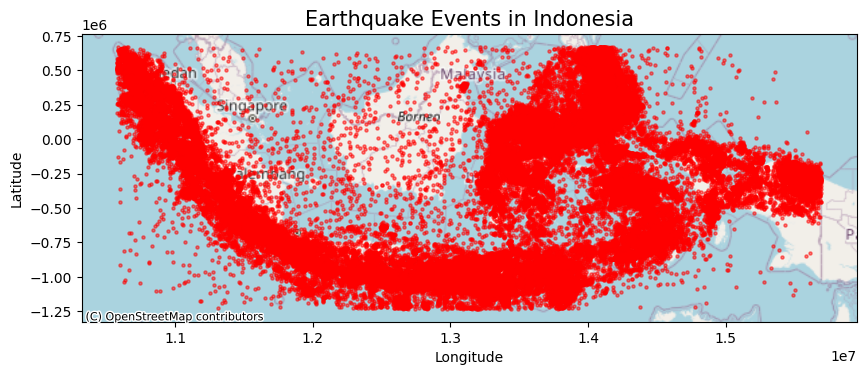

In [15]:
# Create a GeoDataFrame for spatial plotting
gdf = gpd.GeoDataFrame(df_cleaned, geometry=gpd.points_from_xy(df_cleaned.longitude, df_cleaned.latitude))

# Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
gdf.crs = "EPSG:4326"

# Reproject to Web Mercator (EPSG:3857) for compatibility with base maps
gdf = gdf.to_crs(epsg=3857)

# Plot the earthquake data on a map of Indonesia
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, marker='o', color='red', alpha=0.5, markersize=5)

# Add basemap using contextily
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# Add labels and title
ax.set_title('Earthquake Events in Indonesia', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show plot
plt.show()

In [23]:
# Define the mapping of locations to volcanic geographical groups
location_to_group = {
    'Sumatra': [
        'Southern Sumatra, Indonesia', 'Northern Sumatra, Indonesia',
        'Southwest of Sumatra, Indonesia', 'Off West Coast of Northern Sumatra',
        'Sunda Strait, Indonesia'
    ],
    'Sunda Strait and Java': [
        'Java, Indonesia', 'South of Java, Indonesia', 'Sumba Region, Indonesia',
        'Sumbawa Region, Indonesia', 'South of Sumbawa, Indonesia',
        'South of Bali, Indonesia', 'Bali Region, Indonesia'
    ],
    'Lesser Sunda Islands': [
        'Tanimbar Islands Reg., Indonesia', 'Tanimbar Islands Region, Indonesia',
        'Timor Sea', 'Aru Islands Region, Indonesia',
        'Flores Region, Indonesia', 'Bali Sea', 'Flores Sea'
    ],
    'Banda Sea': [
        'Banda Sea', 'Seram, Indonesia', 'Ceram Sea', 'Buru, Indonesia'
    ],
    'Sulawesi and Sangihe Islands': [
        'Talaud Islands, Indonesia', 'Minahassa Peninsula, Sulawesi',
        'Sulawesi, Indonesia', 'Celebes Sea'
    ],
    'Halmahera': [
        'Halmahera, Indonesia', 'Northern Molucca Sea', 'Southern Molucca Sea',
        'North of Halmahera, Indonesia'
    ]
}

# Function to categorize each location
def categorize_location(location):
    for group, locations in location_to_group.items():
        if location in locations:
            return group
    return 'Other'  # For any location that doesn't fit the predefined groups

# Apply the function to create the new column
df_cleaned['volcanic_group'] = df_cleaned['location'].apply(categorize_location)

# Check the result
df_cleaned.head()

<ipython-input-23-8c455bb7a739>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['volcanic_group'] = df_cleaned['location'].apply(categorize_location)


,latitude,longitude,magnitude,mag_type,depth,phasecount,azimuth_gap,location,tectonic_plate,volcanic_group
0,-0.604440,98.895531,2.989742,MLv,20,6.0,146.70738,"Southern Sumatra, Indonesia",Indian-Australian,Sumatra
1,-6.611860,129.387220,5.507549,mb,30,62.0,45.46764,Banda Sea,Pacific,Banda Sea
2,-3.650586,127.990680,3.539674,MLv,5,4.0,331.97404,"Seram, Indonesia",Pacific,Banda Sea
3,-4.198925,128.097000,2.424314,MLv,5,5.0,326.37993,Banda Sea,Pacific,Banda Sea
4,-4.091891,128.200470,2.410045,MLv,10,5.0,314.65474,Banda Sea,Pacific,Banda Sea


In [32]:
df_cleaned = df_cleaned.drop('tectonic_plate', axis=1)
df_cleaned.head()


KeyError: "['tectonic_plate'] not found in axis"

In [28]:
# Re-create the GeoDataFrame to include the 'volcanic_group' column
gdf = gpd.GeoDataFrame(df_cleaned, geometry=gpd.points_from_xy(df_cleaned.longitude, df_cleaned.latitude))

# Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
gdf.crs = "EPSG:4326"

# Reproject to Web Mercator (EPSG:3857) for compatibility with base maps
gdf = gdf.to_crs(epsg=3857)

# Check the GeoDataFrame
gdf.head()

,latitude,longitude,magnitude,mag_type,depth,phasecount,azimuth_gap,location,volcanic_group,geometry
0,-0.604440,98.895531,2.989742,MLv,20,6.0,146.70738,"Southern Sumatra, Indonesia",Sumatra,POINT (11009000.153 -67287.184)
1,-6.611860,129.387220,5.507549,mb,30,62.0,45.46764,Banda Sea,Banda Sea,POINT (14403319.446 -737667.925)
2,-3.650586,127.990680,3.539674,MLv,5,4.0,331.97404,"Seram, Indonesia",Banda Sea,POINT (14247857.324 -406656.621)
3,-4.198925,128.097000,2.424314,MLv,5,5.0,326.37993,Banda Sea,Banda Sea,POINT (14259692.812 -467841.097)
4,-4.091891,128.200470,2.410045,MLv,10,5.0,314.65474,Banda Sea,Banda Sea,POINT (14271211.040 -455894.961)


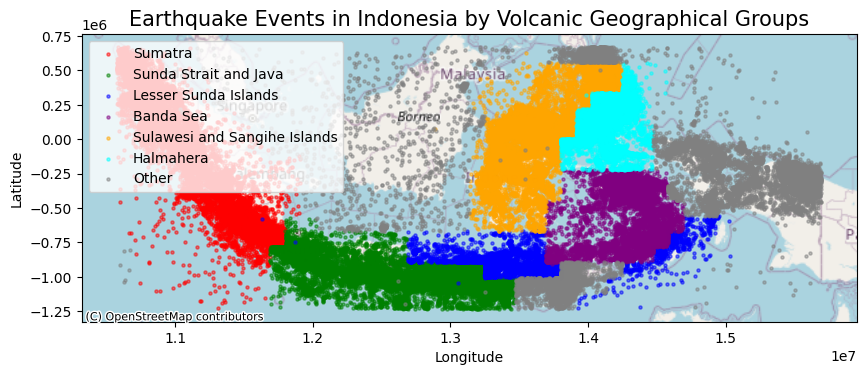

In [29]:
color_map = {
    'Sumatra': 'red',
    'Sunda Strait and Java': 'green',
    'Lesser Sunda Islands': 'blue',
    'Banda Sea': 'purple',
    'Sulawesi and Sangihe Islands': 'orange',
    'Halmahera': 'cyan',
    'Other': 'gray'
}

# Plot the earthquake data on a map of Indonesia
fig, ax = plt.subplots(figsize=(10, 10))

# Plot each volcanic group with a distinct color
for group, color in color_map.items():
    gdf[gdf['volcanic_group'] == group].plot(ax=ax, marker='o', color=color, alpha=0.5, markersize=5, label=group)

# Add basemap using contextily
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# Add labels and title
ax.set_title('Earthquake Events in Indonesia by Volcanic Geographical Groups', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add legend
ax.legend()

# Show plot
plt.show()

# MODELING

In [33]:
df_cleaned = df_cleaned.drop('location', axis=1)
df_cleaned.head()

,latitude,longitude,magnitude,mag_type,depth,phasecount,azimuth_gap,volcanic_group
0,-0.604440,98.895531,2.989742,MLv,20,6.0,146.70738,Sumatra
1,-6.611860,129.387220,5.507549,mb,30,62.0,45.46764,Banda Sea
2,-3.650586,127.990680,3.539674,MLv,5,4.0,331.97404,Banda Sea
3,-4.198925,128.097000,2.424314,MLv,5,5.0,326.37993,Banda Sea
4,-4.091891,128.200470,2.410045,MLv,10,5.0,314.65474,Banda Sea


In [34]:
#Inspect
df_cleaned.head()

#Data Type
df_cleaned.info()

#Check Categorical Data
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
categorical_cols
for col in categorical_cols:
    print(f'Unique values in {col}:')
    print(df_cleaned[col].unique())
    print('---')

<class 'pandas.core.frame.DataFrame'>
Index: 112554 entries, 0 to 113086
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   latitude        112554 non-null  float64
 1   longitude       112554 non-null  float64
 2   magnitude       112554 non-null  float64
 3   mag_type        112554 non-null  object 
 4   depth           112554 non-null  int64  
 5   phasecount      112554 non-null  float64
 6   azimuth_gap     112554 non-null  float64
 7   volcanic_group  112554 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 7.7+ MB
Unique values in mag_type:
['MLv' 'mb' 'Mw(mB)' 'M' 'mB' 'Mw' 'Mwp' 'ML']
---
Unique values in volcanic_group:
['Sumatra' 'Banda Sea' 'Sunda Strait and Java'
 'Sulawesi and Sangihe Islands' 'Lesser Sunda Islands' 'Halmahera' 'Other']
---


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
# Encode categorical variables using one-hot encoding or label encoding
df_cleaned = pd.get_dummies(df_cleaned, columns=['volcanic_group', 'mag_type'])

# Define features and target variable
X = df_cleaned.drop(columns=['magnitude'])  # Features
y = df_cleaned['magnitude']  # Target variable

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [39]:
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.23630288190541787
R^2 Score: 0.6448274411607259


In [40]:
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("Feature Importances:")
print(feature_importances)

Feature Importances:
phasecount                                     0.307226
longitude                                      0.232600
latitude                                       0.184631
azimuth_gap                                    0.108803
depth                                          0.073657
mag_type_mb                                    0.021529
volcanic_group_Other                           0.018281
mag_type_M                                     0.013895
mag_type_MLv                                   0.013234
volcanic_group_Banda Sea                       0.010428
mag_type_Mw                                    0.007840
mag_type_Mw(mB)                                0.002321
volcanic_group_Lesser Sunda Islands            0.001994
volcanic_group_Sunda Strait and Java           0.000899
volcanic_group_Sulawesi and Sangihe Islands    0.000879
volcanic_group_Sumatra                         0.000826
volcanic_group_Halmahera                       0.000694
mag_type_ML                

# Hyperparameter Tuning (Bayesian Optimization)

In [41]:
pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.0 MB/s eta 0:00:00


In [42]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [43]:
# Split your data into training and testing sets
X = df_cleaned.drop('magnitude', axis=1)
y = df_cleaned['magnitude']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter space
param_space = {
    'n_estimators': (10, 500),            # Number of trees in the forest
    'max_depth': (2, 30),                 # Maximum depth of the tree
    'min_samples_split': (2, 20),         # Minimum number of samples required to split an internal node
    'min_samples_leaf': (1, 20),          # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
}

In [48]:
# Use BayesSearchCV for Bayesian optimization
bayes_search = BayesSearchCV(
    estimator=rf,
    search_spaces=param_space,
    n_iter=32,  # Number of parameter settings that are sampled
    cv=3,       # 3-fold cross-validation
    random_state=42,
    n_jobs=-1,  # Use all available cores
)

In [49]:
# Fit the model
bayes_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


BayesSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_iter=32,
              n_jobs=-1, random_state=42,
              search_spaces={'max_depth': (2, 30),
                             'max_features': ['sqrt', 'log2'],
                             'min_samples_leaf': (1, 20),
                             'min_samples_split': (2, 20),
                             'n_estimators': (10, 500)})

In [50]:
# Get the best parameters
best_params = bayes_search.best_params_
print("Best Parameters: ", best_params)

# Evaluate the best model
best_model = bayes_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

Best Parameters:  OrderedDict([('max_depth', 30), ('max_features', 'sqrt'), ('min_samples_leaf', 1), ('min_samples_split', 4), ('n_estimators', 468)])
Mean Squared Error:  0.22569345072520083
R^2 Score:  0.6611528389009467


# Save Model

In [51]:
import pickle

# Save the model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [52]:
from google.colab import files

# Download the model file
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>